<a href="https://colab.research.google.com/github/prachi-28/Machine_Learning_Practice/blob/main/Diabetes_Check_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#Dataset
df=pd.read_csv("/content/Pima_Indian_Diabetes.csv")

In [5]:
#Viewing the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Shape - (No. of rows, No. of columns)
df.shape

(768, 9)

In [8]:
#Creating numpy arrays for X and Y
X = df.drop('Outcome', axis=1).values
Y = df['Outcome'].values

In [10]:
#importing train_test_split
from sklearn.model_selection import train_test_split


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42, stratify=Y)

**KNN Algo**

In [15]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#Setting neighbor from 1 to 9
neighbors = np.arange(1,9)

In [18]:
#Setting up arrays for train and test accuracy for every neighbor
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [19]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)

  #Compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)
    
  #Compute accuracy on the test set
  test_accuracy[i] = knn.score(X_test, y_test) 

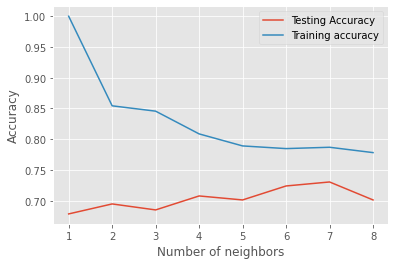

In [20]:
#Generating plot for training and testing accuracy with k value

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
#From the testing graph, we see that at k=7, we get the maximum accuracy
#So, we create KNN with k=7

knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
#Computing the accuracy

knn.score(X_test,Y_test)

0.7305194805194806

In [23]:
#Computing confusion matrix 

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test,Y_pred)



array([[165,  36],
       [ 47,  60]])